Data 6 Python Reference: https://data6.org/su22/reference/

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#PATH CONFIGURATION
if 'google.colab' in str(get_ipython()):
    # If in Colab, we mount drive and point to the drive folder
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_PATH1 = "/content/drive/MyDrive/Side Projects/Resume Projects/Berkeley College Project/Financial Aid Distribution by Race.xlsx"
    DATA_PATH2 = "/content/drive/MyDrive/Side Projects/Resume Projects/Berkeley College Project/[25 years and over] Educational Attainment-2012.xls"
    DATA_PATH3 = "/content/drive/MyDrive/[Tuskegee] Data Deductors/[25 Years and over] Educational Attainment.xlsx"
else:
    #Looks for the file in a relative 'data' folder
    DATA_PATH1 = 'data/Financial Aid Distribution by Race.xlsx'
    DATA_PATH2 = 'data/[25 years and over] Educational Attainment-2012.xls'
    DATA_PATH3 = 'data/[25 Years and over] Educational Attainment.xlsx'

fin_data = pd.read_excel(DATA_PATH1, header=[0,1,2],index_col=0, nrows=23,skiprows=[5,15]).dropna()
ed_2012 = pd.read_excel(DATA_PATH2, header=[4,5,6],index_col=0, nrows=59,skiprows=[7,8,9]).dropna()
ed_2022 = pd.read_excel(DATA_PATH3, header=[3,4],index_col=0, nrows=59,skiprows=[5,6]).dropna()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fin_data.columns

MultiIndex([('Number enrolled (in thousands)',  'Unnamed: 1_level_1', ...),
            (                       'Any aid',   'Percent receiving', ...),
            (            'Unnamed: 3_level_0',  'Unnamed: 3_level_1', ...),
            (            'Unnamed: 4_level_0',  'Unnamed: 4_level_1', ...),
            (            'Unnamed: 5_level_0',     'Average amount ', ...),
            (            'Unnamed: 6_level_0',  'Unnamed: 6_level_1', ...),
            (            'Unnamed: 7_level_0',  'Unnamed: 7_level_1', ...),
            (                        'Grants',   'Percent receiving', ...),
            (            'Unnamed: 9_level_0',  'Unnamed: 9_level_1', ...),
            (           'Unnamed: 10_level_0',     'Average amount ', ...),
            (           'Unnamed: 11_level_0', 'Unnamed: 11_level_1', ...),
            (                         'Loans',  'Percent receiving ', ...),
            (           'Unnamed: 13_level_0',     'Average amount ', ...)],
           

In [25]:
fin_2012 = fin_data.iloc[0:8,].drop(['Number enrolled (in thousands)'], axis=1, level=0).drop(['Average amount '], axis=1, level=1).iloc[:,[3,5]]
fin_2012.columns = fin_2012.columns.get_level_values(0)
fin_2012

Year and selected student characteristic,Grants,Loans
2011-12,,
Total,72.416,56.672
American Indian/\n Alaska Native,85.419,62.324
Asian,63.301,38.444
Black,84.636,71.868
Hispanic,79.905,51.224
Pacific Islander,67.348,50.747
White,68.753,56.418
Two or more races,73.054,59.324


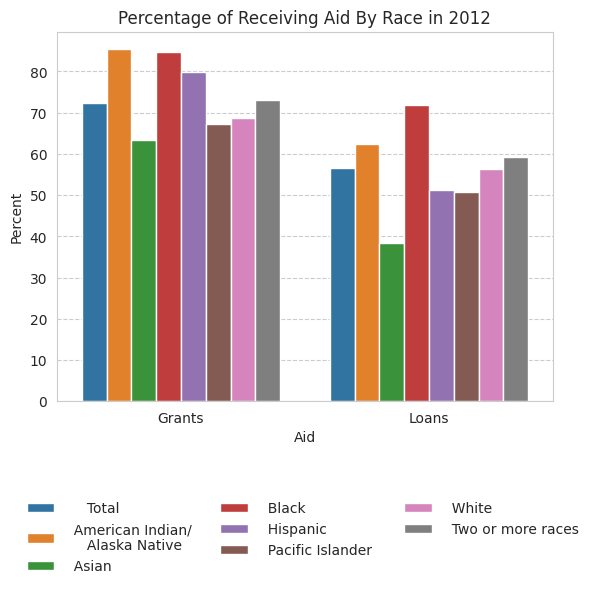

In [28]:
  ## Plotting
  plot_fin_2012 = fin_2012.unstack().to_frame('Percent').reset_index()
  # plot_fin_2012.columns

  plot_fin_2012.rename(columns={'Year and selected student characteristic': 'Aid' ,'2011-12': 'Race'}, inplace=True)
  # plot_fin_2012
  # plot_2012.replace({'-':np.NaN},inplace=True)
  ax=sns.barplot(plot_fin_2012, x='Aid', y='Percent',hue='Race', orient ='x')
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.5), ncol=3, title=None, frameon=False)
  # for container in ax.containers:
  #   ax.bar_label(container)
  ax.set_title('Percentage of Receiving Aid By Race in 2012')
  sns.set_style("whitegrid", {'grid.color': 'black'})
  sns.set_style("whitegrid", {'grid.linestyle': '--'});

In [29]:
fin_2020 = fin_data.iloc[9:16,].drop(['Number enrolled (in thousands)'], axis=1, level=0).drop(['Average amount '], axis=1, level=1).iloc[:,[3,5]]
fin_2020.columns = fin_2020.columns.get_level_values(0)
fin_2020

Year and selected student characteristic,Grants,Loans
2011-12,,
American Indian/\n Alaska Native,77.852767,31.092023
Asian,65.532612,31.813721
Black,84.776113,66.022529
Hispanic,79.021381,39.396307
Pacific Islander,68.560868,50.941851
White,70.399887,47.430312
Two or more races,68.915473,45.067881


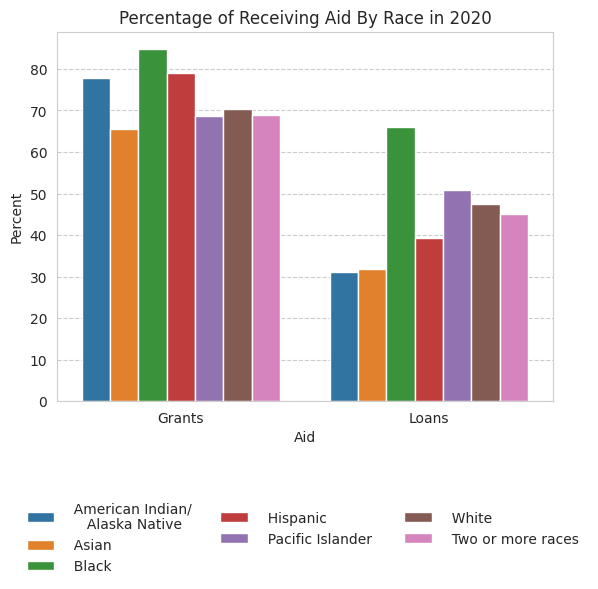

In [30]:
  ## Plotting
  plot_fin_2020 = fin_2020.unstack().to_frame('Percent').reset_index()

  plot_fin_2020.rename(columns={'Year and selected student characteristic': 'Aid' ,'2011-12': 'Race'}, inplace=True)
  # plot_fin_2012
  # plot_2012.replace({'-':np.NaN},inplace=True)
  ax=sns.barplot(plot_fin_2020, x='Aid', y='Percent',hue='Race', orient ='x')
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.5), ncol=3, title=None, frameon=False)
  # for container in ax.containers:
  #   ax.bar_label(container)
  ax.set_title('Percentage of Receiving Aid By Race in 2020')
  sns.set_style("whitegrid", {'grid.color': 'black'})
  sns.set_style("whitegrid", {'grid.linestyle': '--'});

In [ ]:
# fin_data

In [ ]:
# def load_data(filename):
#   df = pd.read_excel(filename, header=[4,5,6],index_col=0, nrows=59,skiprows=[7,8,9]).dropna()
#   df.drop(['Males', 'Females', '25 to 34 ', '35 to 54', '55 years old'], axis=1, level=0, inplace=True)
#   df.drop('Number', axis = 1, level=2, inplace=True)
#   df.columns =['Non-Hispanic White' if c== 'Non-Hispanic' else c for c in df.columns.get_level_values(0)]
#   return df

In [31]:
## Educational Attainment in 2012
# Preprocess
ed_2012.drop(['Males', 'Females', '25 to 34 ', '35 to 54', '55 years old'], axis=1, level=0, inplace=True)
ed_2012.drop('Number', axis = 1, level=2, inplace=True)
ed_2012.columns =['Non-Hispanic White' if c== 'Non-Hispanic' else c for c in ed_2012.columns.get_level_values(0)]
ed_2012.replace({'-':0}, inplace=True)


/tmp/ipython-input-2007447230.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ed_2012.replace({'-':0}, inplace=True)


In [32]:
## Educational Attainment in 2022
# Preprocess
ed_2022.drop(['Male', 'Female', '25 to 34 years old', '35 to 54 years old', '55 years and older'], axis=1, level=0, inplace=True)
ed_2022.drop('Number', axis = 1, level=1, inplace=True)
ed_2022.replace({'Z':0}, inplace=True)
ed_2022.index = ed_2022.index.str.replace("\t ", "")
ed_2022.columns =['Hispanic' if c== 'Hispanic (of any race)' else c for c in ed_2022.columns.get_level_values(0)]
ed_2022.rename(columns={'All people': 'All Races'}, inplace=True)

/tmp/ipython-input-3676302267.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ed_2022.replace({'Z':0}, inplace=True)


In [33]:
ed_2012

,All Races,White,Non-Hispanic White,Black,Asian,Hispanic
"Less than 1 year, no diploma",0.39,0.33,0.11,0.37,1.22,1.48
"1st-4th grade, no diploma",0.83,0.85,0.19,0.53,1.06,4.21
"5th-6th grade, no diploma",1.71,1.77,0.33,1.10,2.27,9.17
"7th-8th grade, no diploma",2.10,2.14,1.51,1.87,1.78,5.53
"9th grade, no diploma",1.80,1.81,1.08,1.84,1.33,5.56
"10th grade, no diploma",1.96,1.83,1.65,2.99,1.30,2.79
"11th grade, no diploma",2.31,2.07,1.81,4.35,0.85,3.56
"12th grade, no diploma",1.26,1.13,0.84,1.99,1.28,2.71
"Less than 1 year, GED",0.00,0.00,0.00,0.00,0.00,0.00
"1st-4th grade, GED",0.05,0.05,0.00,0.00,0.00,0.08


In [34]:
ed_2022.head()

,All Races,White,Non-Hispanic White,Black,Asian,Hispanic
"Less than 1 year, no diploma",0.3,0.3,0.1,0.3,0.9,1.2
"1st-4th grade, no diploma",0.7,0.7,0.1,0.4,0.7,3.1
"5th-6th grade, no diploma",1.2,1.3,0.2,0.6,1.4,5.8
"7th-8th grade, no diploma",1.3,1.4,0.7,1.0,1.4,3.8
"9th grade, no diploma",1.2,1.2,0.6,1.0,0.8,3.9


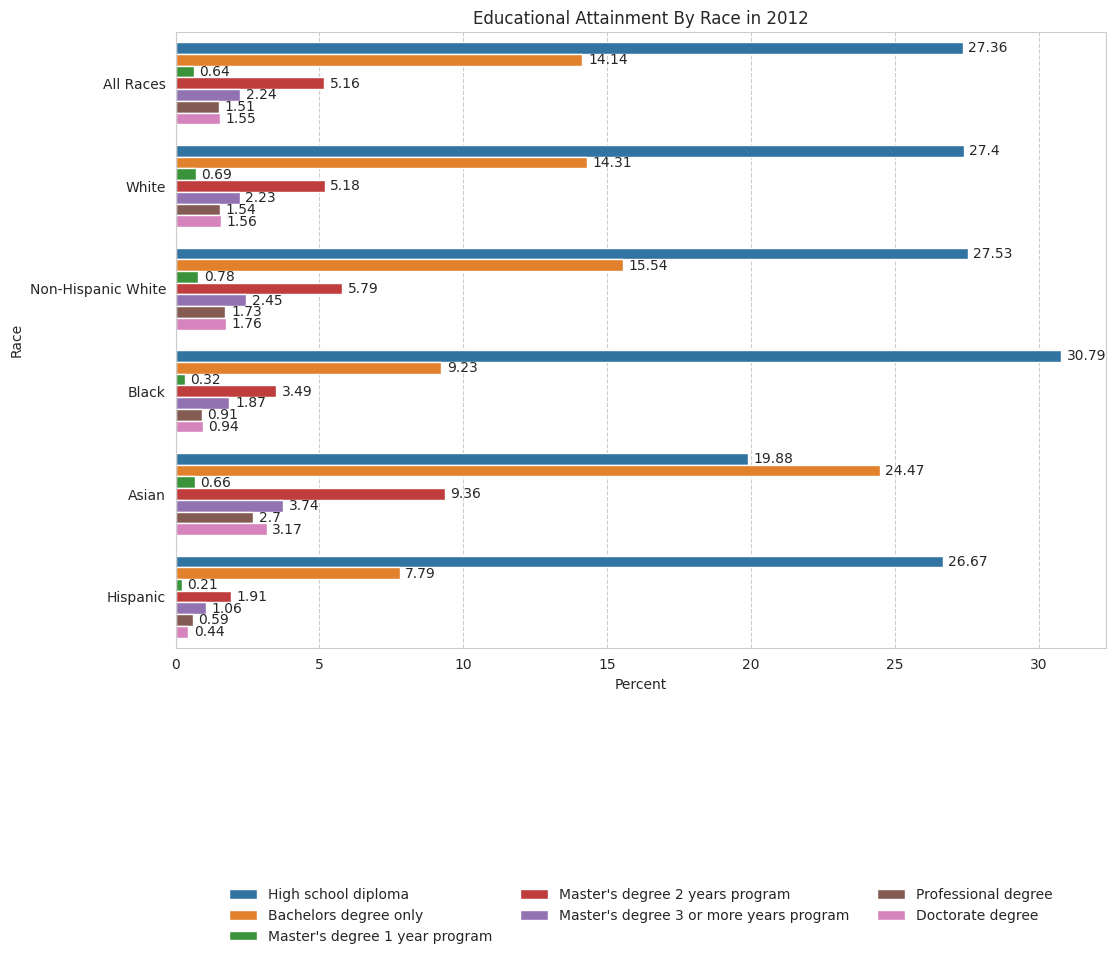

In [37]:
## Plot 2012 with selected education attainment
lst_2012 = ['High school diploma', 'Bachelors degree only',
       "Master's degree 1 year program", "Master's degree 2 years program",
       "Master's degree 3 or more years program", "Professional degree",
       'Doctorate degree']
# ed_2012.index
plt.figure(figsize=(12,8))
plot_2012 = ed_2012.loc[lst_2012,:].unstack().to_frame('Percent').reset_index()
plot_2012.rename(columns={'level_0': 'Race' ,'level_1': 'Educational Attainment'}, inplace=True)
plot_2012.replace({'-':np.nan},inplace=True)
ax=sns.barplot(plot_2012, x='Percent', y='Race',hue='Educational Attainment', orient ='y')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.5), ncol=3, title=None, frameon=False)
for container in ax.containers:
  ax.bar_label(container, padding=4)
ax.set_title('Educational Attainment By Race in 2012');


In [38]:
plot_2012

,Race,Educational Attainment,Percent
0,All Races,High school diploma,27.36
1,All Races,Bachelors degree only,14.14
2,All Races,Master's degree 1 year program,0.64
3,All Races,Master's degree 2 years program,5.16
4,All Races,Master's degree 3 or more years program,2.24
5,All Races,Professional degree,1.51
6,All Races,Doctorate degree,1.55
7,White,High school diploma,27.40
8,White,Bachelors degree only,14.31
9,White,Master's degree 1 year program,0.69


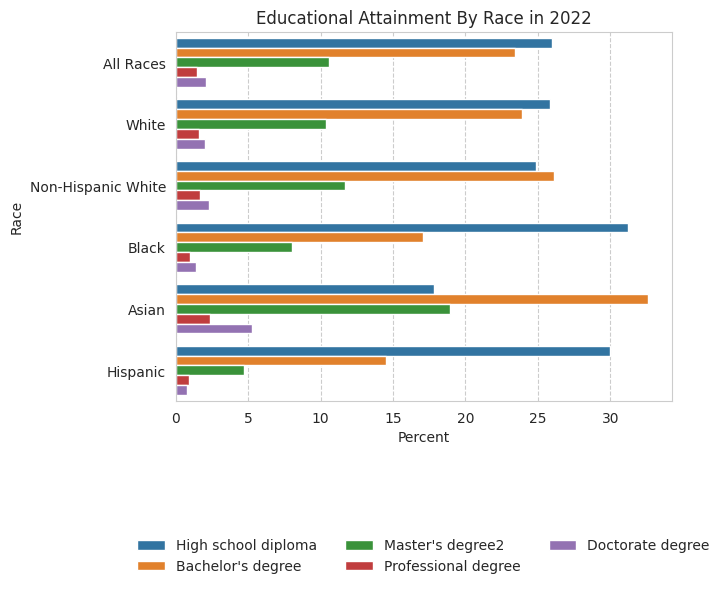

In [36]:
## Plot 2022 with selected education attainment
lst_2022 = ['High school diploma', "Bachelor's degree", "Master's degree2", 'Professional degree',
       'Doctorate degree']
# ed_2022.index
plot_2022 = ed_2022.loc[lst_2022,:].unstack().to_frame('Percent').reset_index()
plot_2022.rename(columns={'level_0': 'Race' ,'level_1': 'Educational Attainment'}, inplace=True)

ax = sns.barplot(plot_2022, x='Percent', y='Race',hue='Educational Attainment', orient ='y')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.5), ncol=3, title=None, frameon=False)
ax.set_title('Educational Attainment By Race in 2022');